# Project 4

In this project, you will analyze the admissions data in detail and build a model and explain it. It is more open ended so feel free to use all the various techniques that you have learnt so far. 

In [44]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
import pylab as pl
import numpy as np


In [45]:
df_raw = pd.read_csv("../assets/admissions.csv")
df = df_raw.dropna() 
print df.head()


   admit    gre   gpa  prestige
0      0  380.0  3.61       3.0
1      1  660.0  3.67       3.0
2      1  800.0  4.00       1.0
3      1  640.0  3.19       4.0
4      0  520.0  2.93       4.0


### What are the predictors and dependent variable ?

In [46]:
# Answer: predictors: gre, gpa, prestige
          # dependent variable: admit
    

### Intro: Write a problem Statement/ Specific hypothesis you have regarding admissions?

In [47]:
#  using the admission data, we will test if gre, gpa, and rank of school, increase the likelihood of being admitted
#  the higher the gre, gpa and rank of school, the higher probability of being admitted


In [48]:
df.shape


(397, 4)

### Dataset:  Find the distribution of admission, GRE, GPA and Prestige

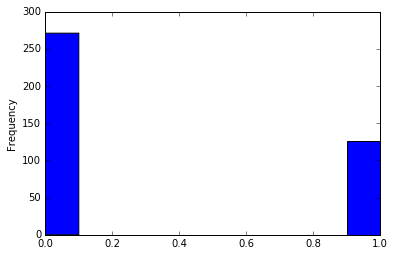

In [49]:

df['admit'].plot(kind = "hist")


In [50]:
print pd.crosstab(index=df["admit"],  # Make a crosstab
                              columns="count")


col_0  count
admit       
0        271
1        126


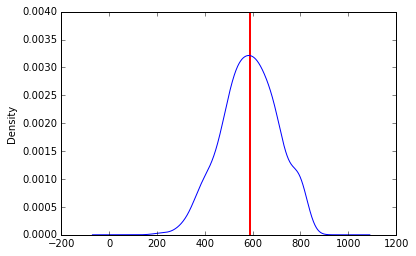

In [51]:
df['gre'].plot(kind = "density")
plt.vlines(df['gre'].mean(), ymin = 0, ymax =0.004, linewidth=2.0, color='red')


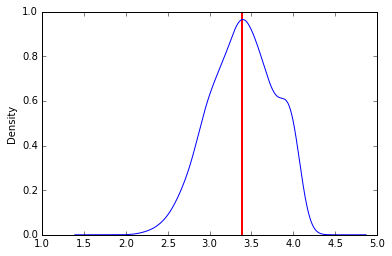

In [52]:
df['gpa'].plot(kind = "density")
plt.vlines(df['gpa'].mean(), ymin =0, ymax =1, linewidth=2.0, color='red')


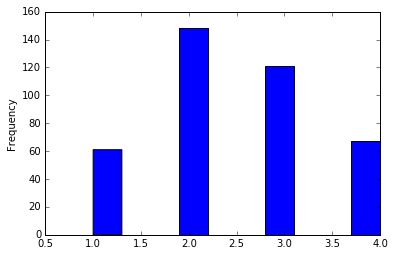

In [53]:
df['prestige'].plot(kind = "hist")


In [54]:
print pd.crosstab(index=df["prestige"],  # Make a crosstab
                              columns="count")


col_0     count
prestige       
1.0          61
2.0         148
3.0         121
4.0          67


In [129]:
# compute and plot the rate of being admitted for all prestiges
df.groupby(['prestige'])[['admit']].mean()


,admit
prestige,
1.0,0.540984
2.0,0.358108
3.0,0.231405
4.0,0.179104


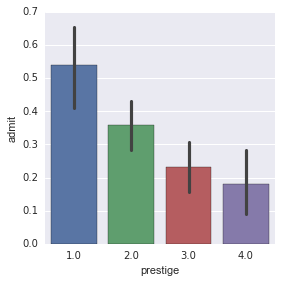

In [127]:

import seaborn as sb
%matplotlib inline

sb.factorplot(x = 'prestige', 
              y = 'admit',
              kind = 'bar',
              data =df)

In [ ]:
# conclusion: the higher rank of school, the higher the rate of being admitted

### FInd the correlation of each feature with admission

In [55]:
df.corr()


,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


### How do you deal with the prestige feature?

In [56]:

# create dummies


### What is the best model and that model's parameter's for predicting admission? Hint: Use GridsearchCV and define what metric you use to find what is best.

In [57]:
# Approach 1: Logistic Model 
# Approach 2: Decision tree
# Approach 3: Random Forest
# Metric: ROC/AUC


In [58]:
# Create Dummy variables
df = df.join(pd.get_dummies(df['prestige'], prefix = 'prestige_'))
df.head()


,admit,gre,gpa,prestige,prestige__1.0,prestige__2.0,prestige__3.0,prestige__4.0
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0


In [59]:
### Approach 1.1: logistic model utilizing sklearn


In [60]:
from sklearn.linear_model import LogisticRegression

lm = LogisticRegression()
lm.fit(df[['gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0']], df['admit'])


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [61]:
print lm.coef_
print lm.intercept_
print df.admit.mean()


[[ 0.00178497  0.23229458 -0.60347467 -1.17214957 -1.37729795]]
[-1.81701706]
0.317380352645


In [62]:
print np.exp(lm.coef_)
print np.exp(lm.intercept_)
print df.admit.mean()


[[ 1.00178657  1.26149128  0.546908    0.3097005   0.25225925]]
[ 0.16250979]
0.317380352645


In [63]:
#### Approach1.2: logisti with Statsmodels, which has great exaustive summary table
import statsmodels.formula.api as smf


In [64]:
# statsmodel needs to create the intercept 
df['intercept'] = 1.0


In [65]:
df.head()

,admit,gre,gpa,prestige,prestige__1.0,prestige__2.0,prestige__3.0,prestige__4.0,intercept
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0,1.0
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0,1.0
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0,1.0
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0,1.0
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0,1.0


In [67]:
logit = smf.Logit(df['admit'],df[['gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0','intercept']])
result = logit.fit()


Optimization terminated successfully.
         Current function value: 0.573854
         Iterations 6


In [69]:
print result.summary()

                           Logit Regression Results                           
Dep. Variable:                  admit   No. Observations:                  397
Model:                          Logit   Df Residuals:                      391
Method:                           MLE   Df Model:                            5
Date:                Mon, 12 Sep 2016   Pseudo R-squ.:                 0.08166
Time:                        13:23:03   Log-Likelihood:                -227.82
converged:                       True   LL-Null:                       -248.08
                                        LLR p-value:                 1.176e-07
                    coef    std err          z      P>|z|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
gre               0.0022      0.001      2.028      0.043      7.44e-05     0.004
gpa               0.7793      0.333      2.344      0.019         0.128     1.431
prestige__2.0    -0.6801      0.317     

In [ ]:
# conlustion: all features are significant at the 95% level

In [70]:
print np.exp(result.params)

gre              1.002221
gpa              2.180027
prestige__2.0    0.506548
prestige__3.0    0.262192
prestige__4.0    0.211525
intercept        0.020716
dtype: float64


In [71]:
params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']
# Take the exponential of the coefficient to get the odds ratio
print np.exp(conf)

                   2.5%     97.5%        OR
gre            1.000074  1.004372  1.002221
gpa            1.136120  4.183113  2.180027
prestige__2.0  0.272168  0.942767  0.506548
prestige__3.0  0.133377  0.515419  0.262192
prestige__4.0  0.093329  0.479411  0.211525
intercept      0.002207  0.194440  0.020716


### What is the most important feature that contributes to the students probability of admission? 

In [ ]:
# gpa, whose coefficient is 0,7794


### Visualize the model relative to prestige and GPA. HINT: Use the technique from the visualization of the flight delay model

In [75]:
# add the column of probability into the raw dataset

df['probability'] =  lm.predict_proba(df[['gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0']]).T[1]
df.head()

,admit,gre,gpa,prestige,prestige__1.0,prestige__2.0,prestige__3.0,prestige__4.0,intercept,probability
0,0,380.0,3.61,3.0,0.0,0.0,1.0,0.0,1.0,0.186594
1,1,660.0,3.67,3.0,0.0,0.0,1.0,0.0,1.0,0.277166
2,1,800.0,4.00,1.0,1.0,0.0,0.0,0.0,1.0,0.631845
3,1,640.0,3.19,4.0,0.0,0.0,0.0,1.0,1.0,0.212334
4,0,520.0,2.93,4.0,0.0,0.0,0.0,1.0,1.0,0.170017


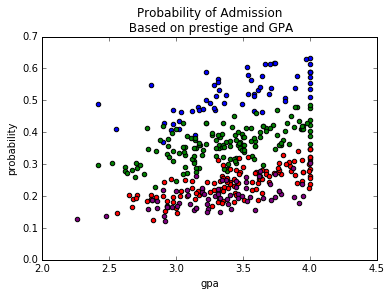

In [79]:
ax = plt.subplot(111)
features = [i for i in df.columns if 'prestige_' in i]
features += ['gpa']
colors = ['blue', 'green', 'red', 'purple']
for e, c in enumerate(colors):
    df[df[features[e]] == 1].plot(x='gpa', y='probability', kind='scatter', color = c, ax=ax)

ax.set(title='Probability of Admission\n Based on prestige and GPA')


In [ ]:
# plot the probability of being admitted over prestige

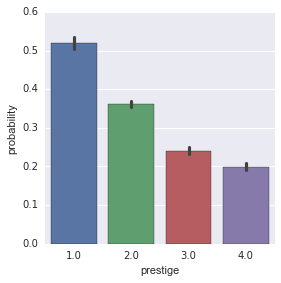

In [126]:
import seaborn as sb
%matplotlib inline

sb.factorplot(x = 'prestige', 
              y = 'probability',
              kind = 'bar',
              data =df)

In [80]:
print features

['prestige__1.0', 'prestige__2.0', 'prestige__3.0', 'prestige__4.0', 'gpa']


In [ ]:
# Approach 2 :  Decisin tree model to predict the admission

In [81]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
model = DecisionTreeClassifier(max_depth=4)

In [86]:
x = df[['gre', 'gpa','prestige__2.0','prestige__3.0', 'prestige__4.0']].dropna()

In [87]:
y = df['admit']

In [88]:
# fits the model

In [89]:
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')

In [ ]:
# helper function to visualize  Decision Trees ( creates a file tree.png)

In [90]:
from sklearn.tree import export_graphviz
from os import system

In [95]:
def build_tree_image(model):
    dotfile = open('tree.dot', 'w')
    export_graphviz(model, out_file = dotfile, feature_names = x.columns)
    dotfile.close()
    system('dot -Tpng tree.dot -o tree.png')
build_tree_image(model)

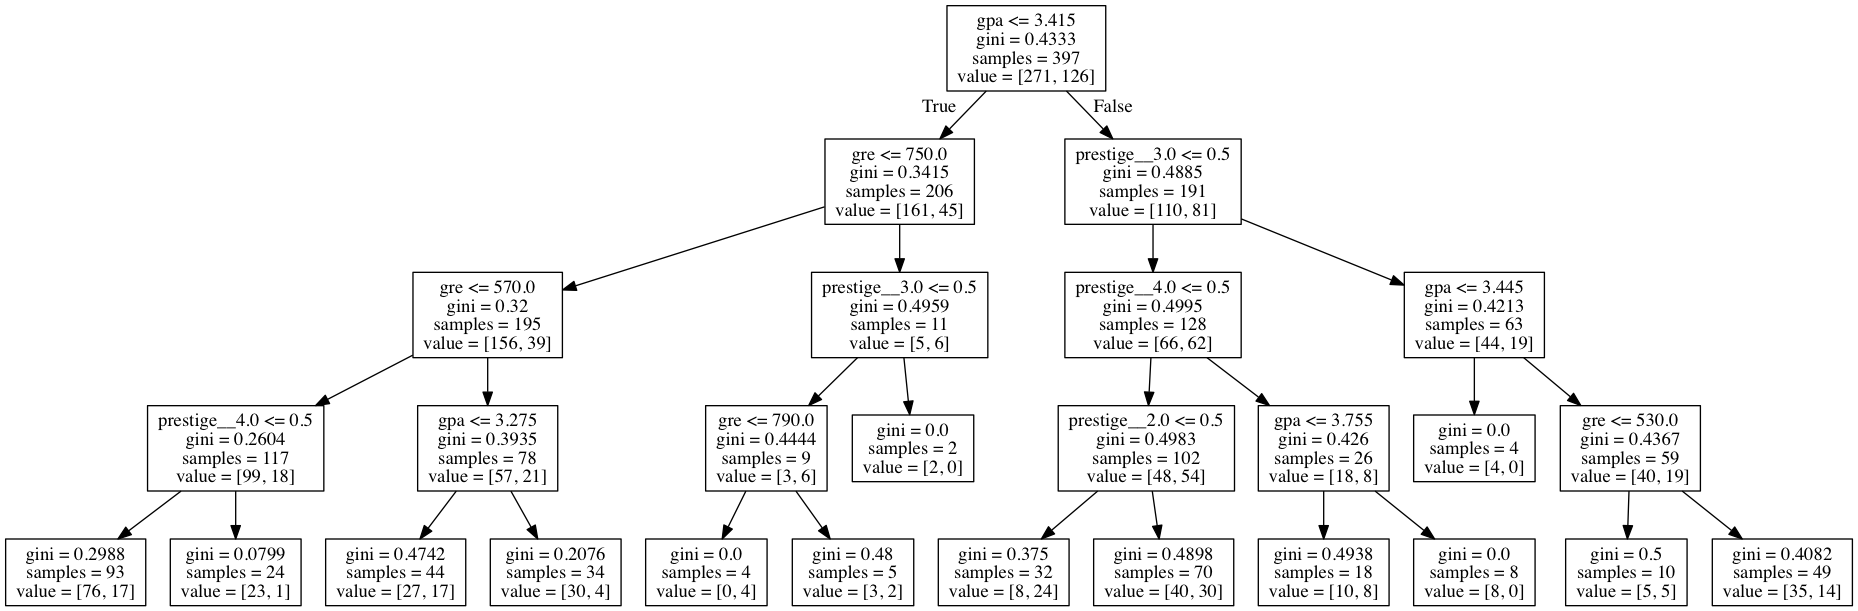

In [96]:
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
# Approach 3.2:  Decision in sciki-learn, evaluate the decision tree using cross-validation; 
#              use the AUC as the evaluation metric

In [98]:
from sklearn.cross_validation import cross_val_score

In [99]:
scores = cross_val_score(model, x, y, scoring = 'roc_auc', cv=5)
print ('CV AUC{}, Average AUC {}' .format(scores, scores.mean()))

CV AUC[ 0.55909091  0.64814815  0.55037037  0.53444444  0.44481481], Average AUC 0.547373737374


In [ ]:
# ajusting decision tree to avoid overfitting

In [101]:
model2 = DecisionTreeClassifier(max_depth =2,
                               min_samples_leaf = 5)
model2.fit(x,y)
build_tree_image(model2)

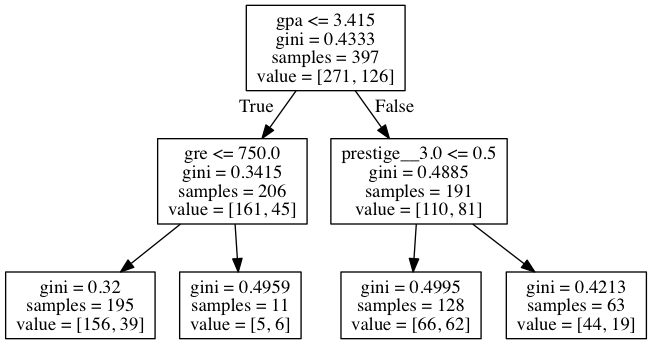

In [102]:
from IPython.display import Image
Image(filename = 'tree.png')

In [ ]:
# Approach 3: Random Forest by sklearn

In [104]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 20)  # 20 means the number of the trees in forest
model.fit(x,y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=20, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [ ]:
# Extract importance of features

In [114]:
features = x.columns
feature_importances = model.feature_importances_


features_df = pd.DataFrame({'Features': features, 'Importance': feature_importances})


In [120]:
features_df.sort_values('Importance', inplace = True, ascending=False)

features_df.head()

,Features,Importance
1,gpa,0.512957
0,gre,0.376456
3,prestige__3.0,0.042222
2,prestige__2.0,0.037188
4,prestige__4.0,0.031177


In [ ]:
# conclusion: the most important feature is gpa, the 2nd is gre.

In [123]:
# evaluate the random forest using cross-validation;increase the number of estimators
# and view hwo it improves predictive performance
from sklearn.cross_validation import cross_val_score

scores = cross_val_score(model, x, y, scoring='roc_auc')

print 'CV AUC {}, Average AUC{}' .format(scores, scores.mean())

for n_trees  in range( 1,100,10):
    model = RandomForestClassifier(n_estimators = n_trees)
    scores = cross_val_score(model, x, y, scoring = 'roc_auc')
    print 'n trees; {}, CV AUC{}, avg AUC{}' .format(n_trees, scores, scores.mean())

CV AUC [ 0.60518053  0.53624339  0.60925926], Average AUC0.583561059752
n trees; 1, CV AUC[ 0.59183673  0.52222222  0.48095238], avg AUC0.531670445956
n trees; 11, CV AUC[ 0.64390372  0.51084656  0.56111111], avg AUC0.571953795763
n trees; 21, CV AUC[ 0.62480377  0.50701058  0.59285714], avg AUC0.57489049751
n trees; 31, CV AUC[ 0.66130298  0.52896825  0.60661376], avg AUC0.598961664438
n trees; 41, CV AUC[ 0.61538462  0.54021164  0.59470899], avg AUC0.583435083435
n trees; 51, CV AUC[ 0.60989011  0.52566138  0.59642857], avg AUC0.57732668566
n trees; 61, CV AUC[ 0.62401884  0.53769841  0.59589947], avg AUC0.585872240634
n trees; 71, CV AUC[ 0.64508111  0.52473545  0.60899471], avg AUC0.592937089366
n trees; 81, CV AUC[ 0.64390372  0.53227513  0.59933862], avg AUC0.591839157315
n trees; 91, CV AUC[ 0.65240712  0.51732804  0.61415344], avg AUC0.594629532725


In [ ]:
# conclusion: when n_tress = 31, it has the highest avgAUC, which is 0.5989